### 1. Import

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.datasets import CIFAR10

### 2. Dataset

In [10]:

transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = CIFAR10(root='data', 
                        train=True, 
                        transform=transform,
                        download=True)
train_dataset, val_dataset = random_split(train_dataset, [40000, 10000])
test_dataset = CIFAR10(root='data', 
                        train=False, 
                        transform=transform,
                        download=True)

Files already downloaded and verified
Files already downloaded and verified


### 3.　可視化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


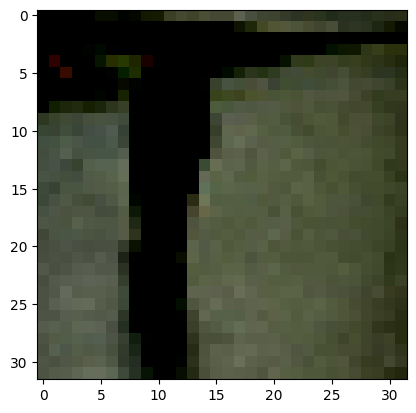

In [20]:
import matplotlib.pyplot as plt

plt.imshow(train_dataset[4][0].permute(1, 2, 0))
plt.show()
plt.close()

### 4. Data Loader

In [21]:
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
val_loader   = DataLoader(dataset=val_dataset,   batch_size=128, shuffle=False)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=128, shuffle=False)

### 5. ViTを実装する

In [23]:
import timm

In [26]:
model_names = timm.list_models(pretrained=True)
for model_name in model_names:
    if model_name.startswith('vit'):
        print(model_name)

vit_base_patch8_224.augreg2_in21k_ft_in1k
vit_base_patch8_224.augreg_in21k
vit_base_patch8_224.augreg_in21k_ft_in1k
vit_base_patch8_224.dino
vit_base_patch14_dinov2.lvd142m
vit_base_patch16_224.augreg2_in21k_ft_in1k
vit_base_patch16_224.augreg_in1k
vit_base_patch16_224.augreg_in21k
vit_base_patch16_224.augreg_in21k_ft_in1k
vit_base_patch16_224.dino
vit_base_patch16_224.mae
vit_base_patch16_224.orig_in21k_ft_in1k
vit_base_patch16_224.sam_in1k
vit_base_patch16_224_miil.in21k
vit_base_patch16_224_miil.in21k_ft_in1k
vit_base_patch16_384.augreg_in1k
vit_base_patch16_384.augreg_in21k_ft_in1k
vit_base_patch16_384.orig_in21k_ft_in1k
vit_base_patch16_clip_224.laion2b
vit_base_patch16_clip_224.laion2b_ft_in1k
vit_base_patch16_clip_224.laion2b_ft_in12k
vit_base_patch16_clip_224.laion2b_ft_in12k_in1k
vit_base_patch16_clip_224.openai
vit_base_patch16_clip_224.openai_ft_in1k
vit_base_patch16_clip_224.openai_ft_in12k
vit_base_patch16_clip_224.openai_ft_in12k_in1k
vit_base_patch16_clip_384.laion2b_ft_

In [27]:
model = timm.create_model('vit_base_patch16_224.orig_in21k_ft_in1k', pretrained=True, num_classes=10)
model.to("cuda:0")

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

In [28]:
# パラメータカウント
params = 0
for p in model.parameters():
    if p.requires_grad:
        params += p.numel()
        
print(f'The Number of params = {params/10**6}M')

The Number of params = 85.806346M
